In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

In [2]:
from utils import *
from data import *
from layers import *
from models import *
from control_models import *

In [3]:
import pickle as p
import io 

In [4]:
limit_gpus()
set_gpu(3)

In [5]:
dataset = "mnist"
ds_train, ds_test, ds_info = load_dataset(dataset, 128)

input_shape = ds_info.features['image'].shape
num_classes = ds_info.features['label'].num_classes

In [75]:
def test_standard(train, test):
    head = keras.models.load_model("ae_conv_head.h5")
    
    std = keras.Sequential([head, layers.Dense(100, activation="relu"), layers.Dense(10, activation="softmax")])
    std.compile(optimizer="rmsprop", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics="accuracy")
    
    #return std
    
    losses = std.fit(train, epochs=5)
    acc = std.evaluate(ds_test)
    
    return acc

In [77]:
upper_limit = test_standard(ds_train, ds_test)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.6092 - accuracy: 0.8660
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0984 - accuracy: 0.9742
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0738 - accuracy: 0.9821
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.9844
Epoch 5/5
79/79 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9915


In [6]:
def test_control(train, test, n_d):
    head = keras.models.load_model("ae_conv_head.h5")
    inv_head = keras.models.load_model("ae_inv_head.h5")
    
    ciris = ControlIrisModel(head, inv_head, ds_info, n_d=n_d, n_hidden=100)
    ciris.compile(optimizer="rmsprop")
    
    data = ciris.generate_external(ds_train, True)
    losses = ciris.train(data, epochs=5)
    acc = ciris.accuracy(ds_test)
    
    return acc

In [7]:
def test_iris(train, test, n_d):
    head = keras.models.load_model("ae_conv_head.h5")
    inv_head = keras.models.load_model("ae_inv_head.h5")
    
    iris = IrisModel(head, inv_head, ds_info, n_d=n_d, n_hidden=100)
    iris.compile(optimizer="rmsprop")
    
    data = iris.generate_external(ds_train, True)
    losses = iris.train(data, epochs=5)
    acc = iris.accuracy(ds_test)
    
    return acc

In [15]:
n_ds = np.floor(np.logspace(1, 3, 21)).astype('int')

In [16]:
n_ds

array([  10,   12,   15,   19,   25,   31,   39,   50,   63,   79,  100,
        125,  158,  199,  251,  316,  398,  501,  630,  794, 1000])

In [17]:
ctrl_l = lambda x: test_control(ds_train, ds_test, x)
iris_l = lambda x: test_iris(ds_train, ds_test, x)

In [18]:
ctrl_trials = [list(map(ctrl_l, n_ds)) for i in range(5)]

Training loss [ 7.37298   8.372596 31.295141 47.27646 ]
Training loss [ 0.4552517  1.1381487 14.668877  33.04172  ]
Training loss [ 0.41142833  1.1220456  13.634823   34.652138  ]
Training loss [ 0.3526859  1.20172   11.992836  31.577507 ]
Training loss [ 0.32938474  1.1764102  13.090839   31.122356  ]
Training loss [ 0.35890788  1.1005915  12.888974   33.681114  ]
Training loss [ 0.3280273  1.1381487 12.478654  33.04172  ]
Training loss [ 0.32695204  1.1220456  12.00243    34.652138  ]
Training loss [ 0.30838838  1.20172    11.5144005  31.577507  ]
Training loss [ 0.29022452  1.1764102  12.57502    31.122356  ]
Training loss [ 0.32071945  1.1005915  12.396112   33.681114  ]
Training loss [ 0.3092911  1.1381487 12.261037  33.04172  ]
Training loss [ 0.3042661  1.1220456 11.857318  34.652138 ]
Training loss [ 0.29238838  1.20172    11.500584   31.577507  ]
Training loss [ 0.27710897  1.1764102  12.533993   31.122356  ]
Training loss [ 0.2971593  1.1005915 12.2982235 33.681114 ]
Training

Training loss [ 0.19474855  0.96738493  6.425711   22.33342   ]
Training loss [ 0.15750355  0.92998123  6.327292   21.71217   ]
Training loss [ 0.16702567  0.9160727   6.833692   23.07889   ]
Training loss [ 0.15655482  0.96507686  6.6362996  23.840431  ]
Training loss [ 0.16234623  1.0018886   6.9589577  24.548811  ]
Training loss [ 0.16098322  0.96738493  6.417216   22.33342   ]
Training loss [ 0.13403323  0.92998123  6.327574   21.71217   ]
Training loss [ 0.14428745  0.9160727   6.833828   23.07889   ]
Training loss [ 0.14362127  0.96507686  6.637304   23.840431  ]
Training loss [ 0.151614   1.0018886  6.9581413 24.548811 ]
Training loss [ 0.15234081  0.96738493  6.416458   22.33342   ]
Training loss [ 0.12465652  0.92998123  6.312748   21.71217   ]
Training loss [ 0.13071981  0.9160727   6.3509502  23.07889   ]
Training loss [ 0.1356      0.96507686  6.049603   23.840431  ]
Training loss [ 0.14337897  1.0018886   6.4796276  24.548811  ]
Training loss [ 0.14439951  0.96738493  5.98

Training loss [ 0.1331103  1.0682037  8.17454   25.111517 ]
Training loss [ 0.1232716  1.063057   8.256801  24.42367  ]
Training loss [ 0.14358722  1.0573897   8.000246   23.876724  ]
Training loss [ 0.12823999  1.0500197   7.785795   23.775911  ]
Training loss [ 0.12912114  1.0625963   8.621752   25.994755  ]
Training loss [ 0.12754193  1.0682037   8.172167   25.111517  ]
Training loss [ 0.11785644  1.063057    8.254743   24.42367   ]
Training loss [ 0.13441554  1.0573897   7.998376   23.876724  ]
Training loss [ 0.11343162  1.0500197   7.7858086  23.775911  ]
Training loss [ 0.11127564  1.0625963   8.620825   25.994755  ]
Training loss [ 0.1059768  1.0682037  8.170325  25.111517 ]
Training loss [ 0.09286375  1.063057    8.252928   24.42367   ]
Training loss [ 0.11547361  1.0573897   7.9980564  23.876724  ]
Training loss [ 0.10356536  1.0500197   7.7863684  23.775911  ]
Training loss [ 0.10432    1.0625963  8.621164  25.994755 ]
Training loss [ 5.568695  8.493357 23.198183 43.879734]


Training loss [ 0.03090836  0.97436833  8.934575   26.495216  ]
Training loss [ 0.03696107  0.96754074  8.887888   25.890741  ]
Training loss [ 0.03027687  0.96980774  8.750071   26.308971  ]
Training loss [ 0.04059751  0.9741857   8.870464   26.178354  ]
Training loss [ 0.03868763  0.97093505  9.112265   27.061068  ]
Training loss [ 0.02969491  0.97436833  8.682455   26.495216  ]
Training loss [ 0.03460697  0.96754074  8.738215   25.890741  ]
Training loss [ 0.02802503  0.96980774  8.744531   26.308971  ]
Training loss [ 0.03728398  0.9741857   8.87011    26.178354  ]
Training loss [ 0.03646314  0.97093505  9.103563   27.061068  ]
Training loss [ 2.9053192  9.398116  23.934011  36.80714  ]
Training loss [ 0.2756874  1.0030732 10.364876  26.963669 ]
Training loss [ 0.10394552  1.0052555   9.807054   26.58705   ]
Training loss [ 0.07694363  1.0110933   9.296312   26.113174  ]
Training loss [ 0.05762063  1.0087814   9.100664   26.229202  ]
Training loss [ 0.06724712  0.98997134  8.968377

Training loss [ 0.04822397  0.995246    8.318653   26.566452  ]
Training loss [ 0.05267809  1.005536    7.909461   25.914707  ]
Training loss [ 0.04467402  0.9990905   8.262219   26.188524  ]
Training loss [ 0.04781067  0.99963605  7.9689865  25.711048  ]
Training loss [ 0.06034228  0.9936682   7.8852863  25.147287  ]
Training loss [ 0.05597225  0.995246    8.141154   26.566452  ]
Training loss [ 1.8087219  5.032006  19.708902  26.667149 ]
Training loss [ 0.3612758   0.96916807  8.451723   23.991316  ]
Training loss [ 0.31235313  0.9795393   7.4177494  22.935577  ]
Training loss [ 0.30113554  0.95199406  6.977274   22.723677  ]
Training loss [ 0.282182    0.98557365  6.728339   20.420158  ]
Training loss [ 0.3003003  0.9879255  6.6213703 21.174156 ]
Training loss [ 0.29397196  0.9691102   7.5286903  23.991316  ]
Training loss [ 0.26791435  0.9795393   7.0365324  22.935577  ]
Training loss [ 0.27544975  0.95199406  6.7132707  22.723677  ]
Training loss [ 0.26617485  0.98557365  6.428176

Training loss [ 0.15732896  1.088337   10.645416   26.7786    ]
Training loss [ 3.5859308  8.926689  20.457031  44.556007 ]
Training loss [ 0.45138076  0.9073665   8.527781   20.91703   ]
Training loss [ 0.30455202  0.93468446  8.126099   21.612606  ]
Training loss [ 0.2461254  0.9247562  8.582816  22.798454 ]
Training loss [ 0.21619552  0.93303823  7.7923307  21.937618  ]
Training loss [ 0.18280807  0.92682874  7.999882   22.051208  ]
Training loss [ 0.18053319  0.9072386   8.002059   20.916021  ]
Training loss [ 0.16867314  0.93468446  7.961483   21.612606  ]
Training loss [ 0.15225767  0.9247562   8.537336   22.798454  ]
Training loss [ 0.14046505  0.93303823  7.7693524  21.937618  ]
Training loss [ 0.15498509  0.92682874  7.991273   22.051208  ]
Training loss [ 0.15077674  0.9072386   8.002445   20.91601   ]
Training loss [ 0.14908972  0.93468446  7.9592667  21.612606  ]
Training loss [ 0.13359398  0.9247562   8.537174   22.798454  ]
Training loss [ 0.1262371   0.93303823  7.768683

Training loss [ 0.12026537  0.99213547  9.079903   24.955915  ]
Training loss [ 0.12025584  1.0047238   9.297616   25.134441  ]
Training loss [ 0.09408355  1.0034895   8.978411   24.981739  ]
Training loss [ 0.09143969  0.997457    8.236439   24.833458  ]
Training loss [ 0.0748037  1.0006132  8.168304  24.898937 ]
Training loss [ 0.08276089  0.99213547  8.391602   24.955915  ]
Training loss [ 0.09292433  1.0047238   8.6175165  25.134441  ]
Training loss [ 0.07803158  1.0034895   8.313478   24.981739  ]
Training loss [ 0.07675248  0.997457    8.105979   24.833458  ]
Training loss [ 0.06831858  1.0006132   8.154024   24.898937  ]
Training loss [ 0.07451482  0.99213547  8.388823   24.955915  ]
Training loss [ 0.0859832  1.0047238  8.464395  25.134441 ]
Training loss [ 0.07379936  1.0034895   8.173502   24.981739  ]
Training loss [ 0.07030933  0.997457    7.982623   24.833458  ]
Training loss [ 0.06516843  1.0006132   8.029134   24.898937  ]
Training loss [ 0.07120109  0.99213547  8.301313

Training loss [ 0.0356297  0.9818186  8.215592  26.557545 ]
Training loss [ 0.0507601  0.9706595  8.177276  26.787106 ]
Training loss [ 0.0424278   0.96802735  8.27759    27.200321  ]
Training loss [ 0.04735438  0.9765525   8.322617   26.62067   ]
Training loss [ 0.04448491  0.9707717   8.085312   26.054214  ]
Training loss [ 0.02849808  0.9818186   8.144609   26.557545  ]
Training loss [ 0.04410798  0.9706595   8.036292   26.787106  ]
Training loss [ 0.03618647  0.96802735  7.9835496  27.200321  ]
Training loss [ 0.03993969  0.9765525   8.018708   26.62067   ]
Training loss [ 0.0401534  0.9707717  7.741043  26.054214 ]
Training loss [2.6395913e-02 9.8181862e-01 7.7943792e+00 2.6557545e+01]
Training loss [ 0.04152545  0.9706595   7.810253   26.787106  ]
Training loss [ 0.03407871  0.96802735  7.924403   27.200321  ]
Training loss [ 0.03544698  0.9765525   7.948951   26.62067   ]
Training loss [ 0.04545981  0.9707717   7.7407985  26.054214  ]
Training loss [2.5714956e-02 9.8181862e-01 7

Training loss [ 0.05646394  0.98564816  8.395363   25.953897  ]
Training loss [ 0.04495536  0.9831963   8.425614   26.163267  ]
Training loss [ 0.05469018  0.9791398   8.4811325  26.348536  ]
Training loss [ 0.06808673  0.98355055  8.543074   26.361507  ]
Training loss [ 0.0545918   0.99027723  7.9887276  25.725094  ]
Training loss [ 0.0464001   0.98564816  8.048167   25.953897  ]
Training loss [ 0.03912783  0.9831963   7.976708   26.163267  ]
Training loss [ 0.05014916  0.9791398   8.151577   26.348536  ]
Training loss [ 0.05705524  0.98355055  8.262003   26.361507  ]
Training loss [ 0.05222134  0.99027723  7.813186   25.725094  ]
Training loss [ 0.04366169  0.98564816  7.9297924  25.953897  ]
Training loss [ 0.03700507  0.9831963   7.890239   26.163267  ]
Training loss [ 0.04884699  0.9791398   8.090842   26.348536  ]
Training loss [ 1.2140708  5.234164  20.489864  29.934832 ]
Training loss [ 0.42571312  0.94388306  8.0031185  22.12343   ]
Training loss [ 0.41720054  1.0599542   7.52

Training loss [ 0.23609775  1.0600735   8.706379   23.501085  ]
Training loss [ 0.21333688  1.0561323   8.010463   21.2479    ]
Training loss [ 0.199229   1.0850455  8.504101  22.822634 ]
Training loss [ 0.22431254  1.0742302   8.176477   21.835072  ]
Training loss [ 0.16516268  1.0976943   8.018515   22.555925  ]
Training loss [ 0.20451313  1.0600735   8.706489   23.501085  ]
Training loss [ 0.19111526  1.0561323   8.011137   21.2479    ]
Training loss [ 0.18569797  1.0850455   8.50387    22.822634  ]
Training loss [ 5.5971365  6.702688  21.749493  33.005074 ]
Training loss [ 0.6055456  1.0239326  8.1464405 23.710346 ]
Training loss [ 0.35918373  1.0107973   7.1780434  23.373638  ]
Training loss [ 0.30520484  1.0672398   7.0545745  22.299353  ]
Training loss [ 0.24341361  1.0100548   7.0501175  22.79647   ]
Training loss [ 0.23860939  0.9949517   7.1568727  22.994953  ]
Training loss [ 0.22701453  1.0237255   7.3832884  23.710346  ]
Training loss [ 0.2196485  1.0107973  6.967614  23.3

Training loss [ 0.05527406  0.9706373   8.252715   29.443525  ]
Training loss [ 0.07626718  0.9498046   8.157341   29.150986  ]
Training loss [ 0.06923074  0.97681284  7.906516   28.906355  ]
Training loss [ 3.794005 12.171531 23.25336  42.678932]
Training loss [ 0.43848082  1.0209417  10.915907   26.395994  ]
Training loss [ 0.21642019  1.03385    10.273975   25.267176  ]
Training loss [ 0.1241692  1.0487205  9.984449  25.501915 ]
Training loss [ 0.0968966  1.0450748 10.517955  26.948849 ]
Training loss [ 0.11831729  1.0385635   9.89137    25.086857  ]
Training loss [ 0.09063186  1.0209389  10.394768   26.395689  ]
Training loss [ 0.092955  1.03385  10.249171 25.267176]
Training loss [ 0.06956859  1.0487205   9.596354   25.501915  ]
Training loss [ 0.06211573  1.0450748   9.231445   26.948849  ]
Training loss [ 0.09812373  1.0385635   8.821431   25.086857  ]
Training loss [ 0.07380789  1.0209389   9.240156   26.395689  ]
Training loss [ 0.08216091  1.03385     9.177353   25.267176  ]


Training loss [ 0.13231692  1.0700382   9.794067   25.186262  ]
Training loss [ 0.07710015  1.0573864   9.361965   25.093199  ]
Training loss [ 0.05453249  1.0516195   9.209931   24.342505  ]
Training loss [ 0.06181415  1.0632801   9.802337   26.028889  ]
Training loss [ 0.04773689  1.0687578   8.998979   24.161964  ]
Training loss [ 0.05531863  1.0700407   9.492456   25.185354  ]
Training loss [ 0.04206118  1.0573864   9.20324    25.093199  ]
Training loss [ 0.03630457  1.0516195   8.980242   24.342505  ]
Training loss [ 0.04621213  1.0632801   9.571829   26.028889  ]
Training loss [ 0.03734561  1.0687578   8.855545   24.161964  ]
Training loss [ 0.04535417  1.0700382   9.297845   25.185354  ]
Training loss [ 0.0344223  1.0573864  8.7743435 25.093199 ]
Training loss [ 0.03203388  1.0516195   8.655262   24.342505  ]
Training loss [ 0.04000842  1.0632801   9.208225   26.028889  ]
Training loss [ 0.03391556  1.0687578   8.508783   24.161964  ]
Training loss [ 0.03741323  1.0700382   9.06

Training loss [ 0.1376847   0.99343026  8.882114   25.911192  ]
Training loss [ 0.12908193  0.9949454   8.835915   25.51228   ]
Training loss [ 0.10393403  0.99825406  8.67281    25.37909   ]
Training loss [ 0.09829003  0.9968026   8.441777   26.140656  ]
Training loss [ 0.10348559  1.0027772   8.453558   26.269276  ]
Training loss [ 0.10747038  0.99343026  8.384943   25.911192  ]
Training loss [ 0.09105039  0.9949454   8.382771   25.51228   ]
Training loss [ 0.08795939  0.99825406  8.338254   25.37909   ]
Training loss [ 0.09812595  0.9968026   8.148592   26.140656  ]
Training loss [ 0.1076109  1.0027772  8.207417  26.269276 ]
Training loss [ 0.08797238  0.99343026  8.181356   25.911192  ]
Training loss [ 0.08658683  0.9949454   8.1559305  25.51228   ]
Training loss [ 0.07898577  0.99825406  8.151133   25.37909   ]
Training loss [ 0.08337615  0.9968026   8.008963   26.140656  ]
Training loss [ 0.08853808  1.0027772   8.068359   26.269276  ]
Training loss [ 0.0828729   0.99343026  8.04

Training loss [ 0.18218835  1.0279624   8.64234    28.133945  ]
Training loss [ 0.18327205  1.0058775   8.841476   28.023554  ]
Training loss [ 0.18238275  1.0056779   8.814015   27.558075  ]
Training loss [ 0.19373393  0.9865304  10.315077   30.500414  ]
Training loss [ 0.15747926  1.0193028   8.419406   27.583454  ]
Training loss [ 0.1627053  1.0279624  8.637291  28.133945 ]
Training loss [ 0.16704306  1.0058775   8.8403225  28.023554  ]
Training loss [ 0.17074347  1.0056779   8.814128   27.558075  ]
Training loss [ 0.17804599  0.9865304  10.314348   30.500414  ]
Training loss [ 0.15380311  1.0193028   8.419261   27.583454  ]
Training loss [ 0.15951282  1.0279624   8.637498   28.133945  ]
Training loss [ 0.16351156  1.0058775   8.839137   28.023554  ]
Training loss [ 0.16142677  1.0056779   8.814091   27.558075  ]
Training loss [ 0.17247358  0.9865304  10.313263   30.500414  ]
Training loss [ 5.6878357  8.55217   21.044249  50.33642  ]
Training loss [ 0.60477555  1.1183937   9.451297

Training loss [ 0.05595464  0.9489342   8.95804    25.999788  ]
Training loss [ 0.07510813  1.0175226   9.122167   26.777477  ]
Training loss [ 0.07857007  0.989972    8.997325   27.58663   ]
Training loss [ 0.07471144  1.0045313   8.600295   26.076347  ]
Training loss [ 0.073528    0.97253877  8.835212   27.59636   ]
Training loss [ 0.05488761  0.9489342   8.517259   25.999788  ]
Training loss [ 0.07428255  1.0175226   8.621597   26.777477  ]
Training loss [ 0.0769752  0.989972   8.748747  27.58663  ]
Training loss [ 0.07182877  1.0045313   8.390217   26.076347  ]
Training loss [ 3.2050204 11.842779  24.480553  54.63995  ]
Training loss [ 0.39068264  0.93645865 10.16416    27.133793  ]
Training loss [ 0.21280761  0.9680723   9.705726   26.893585  ]
Training loss [ 0.14525072  0.9606244   9.483652   26.905872  ]
Training loss [ 0.10375895  0.96057326  7.95497    27.160181  ]
Training loss [ 0.08631606  0.9367605   7.822148   26.346317  ]
Training loss [ 0.0874229  0.9362284  7.9142933 

Training loss [ 0.04523284  0.9644847   7.6951013  25.211643  ]
Training loss [ 0.03483946  0.9755472   7.662633   26.254868  ]
Training loss [ 0.04782228  0.98082626  7.748231   25.180317  ]
Training loss [ 0.03626976  0.9785229   7.7197223  25.79727   ]
Training loss [ 0.04456636  0.96926314  7.520953   24.938524  ]
Training loss [ 3.9078796  8.793839  25.422714  43.489532 ]
Training loss [ 0.26684394  1.0342982   9.787412   26.36366   ]
Training loss [ 0.10428047  1.0271523   8.806278   26.13759   ]
Training loss [ 0.07845922  1.0237913   9.117895   26.86586   ]
Training loss [ 0.06425658  1.0104046   9.445297   27.722715  ]
Training loss [ 0.07137962  1.0300411   9.316475   27.391579  ]
Training loss [ 0.05197857  1.0342662   8.713725   26.36366   ]
Training loss [ 0.0455583  1.0271523  8.127067  26.13759  ]
Training loss [ 0.05213545  1.0237913   8.486692   26.86586   ]
Training loss [ 0.05111018  1.0104046   8.825043   27.722715  ]
Training loss [ 0.04945964  1.0300411   8.914715

Training loss [ 0.03343673  0.9872452   8.115046   26.350468  ]
Training loss [2.0930436e-02 9.9653590e-01 7.9030056e+00 2.6159294e+01]
Training loss [ 2.1256926  4.0854874 23.616863  34.8001   ]
Training loss [ 0.3380887  1.0030936 10.914703  26.369673 ]
Training loss [ 0.18731637  0.99859273  9.536079   24.709862  ]
Training loss [ 0.10063824  0.99960434  8.923463   24.6406    ]
Training loss [ 0.09546563  1.012641    9.337833   25.330551  ]
Training loss [ 0.08718033  1.0035384   9.026216   25.0797    ]
Training loss [ 0.08303705  1.0030936   9.296087   26.369673  ]
Training loss [ 0.11034582  0.99859273  8.967865   24.709862  ]
Training loss [ 0.07161206  0.99960434  8.429374   24.6406    ]
Training loss [ 0.05889124  1.012641    8.792687   25.330551  ]
Training loss [ 0.05854641  1.0035384   8.550575   25.0797    ]
Training loss [ 0.06867594  1.0030936   8.989664   26.369673  ]
Training loss [ 0.07134922  0.99859273  8.45466    24.709862  ]
Training loss [ 0.05274701  0.99960434  

Training loss [ 0.30654734  1.0270736   6.8812456  29.61969   ]
Training loss [ 0.29230583  1.0547264   7.185392   29.81212   ]
Training loss [ 0.28855786  1.0529917   7.2409186  30.357906  ]
Training loss [ 0.25636363  1.0283302   7.387003   30.733742  ]
Training loss [ 0.21447144  1.0526648   7.037855   30.245413  ]
Training loss [ 0.22663811  1.0270565   6.6783323  29.61969   ]
Training loss [ 0.24998313  1.0547264   7.130016   29.81212   ]
Training loss [ 0.25184602  1.0529917   7.220239   30.357906  ]
Training loss [ 0.21898314  1.0283302   7.385633   30.733742  ]
Training loss [ 0.19856912  1.0526648   7.037373   30.245413  ]
Training loss [ 0.1873133  1.0270565  6.675355  29.61969  ]
Training loss [ 0.213745   1.0547264  7.1300173 29.81212  ]
Training loss [ 0.22983724  1.0529917   7.2200556  30.357906  ]
Training loss [ 0.20509154  1.0283302   7.386427   30.733742  ]
Training loss [ 0.17840204  1.0526648   7.0367417  30.245413  ]
Training loss [ 0.17181104  1.0270565   6.674094

Training loss [ 0.09090378  1.005909    8.355177   25.491554  ]
Training loss [ 0.09400212  0.9991426   8.684866   26.572407  ]
Training loss [ 0.08881222  0.9783894   8.177354   24.761826  ]
Training loss [ 0.07324412  0.9838687   8.100361   24.872505  ]
Training loss [ 0.08671343  0.9781718   7.87255    24.600758  ]
Training loss [ 0.07899131  1.005909    8.354503   25.491554  ]
Training loss [ 0.08436336  0.9991426   8.47138    26.572407  ]
Training loss [ 0.08172197  0.9783894   7.9015026  24.761826  ]
Training loss [ 0.0699231  0.9838687  7.8340917 24.872505 ]
Training loss [ 0.08297487  0.9781718   7.606355   24.600758  ]
Training loss [ 0.07243603  1.005909    8.119217   25.491554  ]
Training loss [ 0.08038975  0.9991426   8.464083   26.572407  ]
Training loss [ 0.07874675  0.9783894   7.891654   24.761826  ]
Training loss [ 0.06795293  0.9838687   7.832549   24.872505  ]
Training loss [ 0.07871675  0.9781718   7.6046624  24.600758  ]
Training loss [ 0.06876282  1.005909    8.11

Training loss [ 0.03591147  1.0012546   7.4858656  26.078255  ]
Training loss [ 0.04834878  0.9814695   7.4221997  25.614178  ]
Training loss [ 0.04477074  0.990433    7.0860105  24.326603  ]
Training loss [ 0.03826374  0.98445606  7.1858053  25.928986  ]
Training loss [ 0.0373719   0.98958963  7.2745404  26.174112  ]
Training loss [ 0.03032978  1.0012546   7.455637   26.078255  ]
Training loss [ 0.04330949  0.9814695   7.4152813  25.614178  ]
Training loss [ 0.03926839  0.990433    7.0198755  24.326603  ]
Training loss [ 0.03647136  0.98445606  7.183324   25.928986  ]
Training loss [ 0.03451443  0.98958963  7.2707872  26.174112  ]
Training loss [ 0.02766127  1.0012546   7.4192963  26.078255  ]
Training loss [ 0.04038879  0.9814695   7.4119925  25.614178  ]
Training loss [ 2.5616422  8.020569  22.273323  37.772713 ]
Training loss [ 0.28935173  1.0094935   9.835878   24.31245   ]
Training loss [ 0.16758762  1.0012815   8.852685   23.86753   ]
Training loss [ 0.09712122  1.005192    8.91

Training loss [ 0.04674738  1.009187    8.380521   25.959433  ]
Training loss [ 0.04816177  1.0078597   8.685228   26.144644  ]
Training loss [ 0.04267586  1.0137262   8.334868   24.85011   ]
Training loss [ 0.03704662  1.0114232   8.259187   25.37561   ]
Training loss [ 0.0359589  1.0110195  8.636614  25.868454 ]
Training loss [ 0.04320012  1.009187    8.264136   25.959433  ]
Training loss [ 0.04384694  1.0078597   8.357531   26.144644  ]
Training loss [ 0.04053049  1.0137262   8.043539   24.85011   ]
Training loss [ 2.3433623  5.141082  24.340721  35.482353 ]
Training loss [ 0.30004382  1.0049131  11.085517   25.700306  ]
Training loss [ 0.16175348  1.012827   10.832758   27.166086  ]
Training loss [ 0.12214571  1.010024   10.166418   25.6206    ]
Training loss [ 0.09081975  1.0106605   9.874683   26.030334  ]
Training loss [ 0.0947282  1.0021025  9.300225  25.483341 ]
Training loss [ 0.08050631  1.0049131   9.374685   25.700306  ]
Training loss [ 0.07426997  1.012827    9.727388   2

In [19]:
iris_trials = [list(map(iris_l, n_ds)) for i in range(5)]

Training loss [0.39624792 0.39299905 0.41354263 0.45667845]
Training loss [0.29225314 0.15257472 0.19177729 0.15185836]
Training loss [0.3035823  0.1569348  0.20061174 0.15587634]
Training loss [0.27971268 0.13298959 0.18961912 0.13248768]
Training loss [0.31410784 0.15992683 0.22525463 0.1591801 ]
Training loss [0.29055455 0.15115252 0.19195393 0.15039024]
Training loss [0.28773803 0.14093198 0.18781978 0.14038062]
Training loss [0.29993    0.1486406  0.20058587 0.14728692]
Training loss [0.27513874 0.12440062 0.18938743 0.1241093 ]
Training loss [0.30876225 0.15291455 0.22532159 0.15175161]
Training loss [0.2859624  0.14343394 0.19196376 0.14254025]
Training loss [0.2827394  0.13266392 0.18780512 0.13253772]
Training loss [0.29428637 0.13979776 0.20060474 0.1382643 ]
Training loss [0.26911327 0.11474641 0.18935695 0.11496279]
Training loss [0.30158666 0.14386612 0.22532648 0.14317918]
Training loss [0.27932316 0.13419497 0.19195059 0.13408506]
Training loss [0.2765454  0.12275555 0.1

Training loss [0.23350385 0.1210656  0.17692116 0.12101795]
Training loss [0.21382086 0.12202009 0.17233232 0.11950815]
Training loss [0.21494438 0.11549276 0.17406525 0.11435272]
Training loss [0.20106763 0.11414764 0.16384241 0.11311425]
Training loss [0.21205324 0.11604492 0.16764666 0.11666236]
Training loss [0.22268775 0.1144262  0.17690715 0.11451594]
Training loss [0.20389423 0.11538026 0.172317   0.113232  ]
Training loss [0.20510325 0.11007094 0.1740548  0.10878939]
Training loss [0.19026741 0.10864146 0.16382784 0.10702699]
Training loss [0.20460172 0.11006179 0.16763401 0.11013786]
Training loss [0.21399802 0.10894324 0.17689535 0.10895479]
Training loss [0.19631377 0.1094737  0.17230329 0.10759792]
Training loss [0.19821198 0.10514271 0.17404342 0.10385436]
Training loss [0.44826883 0.4754961  0.51922774 0.46828344]
Training loss [0.26462922 0.16720086 0.19939014 0.1635739 ]
Training loss [0.25609002 0.15210432 0.20546877 0.15106195]
Training loss [0.25773615 0.15942574 0.2

Training loss [0.1737164  0.10751919 0.18543035 0.10672575]
Training loss [0.44559088 0.47446835 0.52186346 0.47001058]
Training loss [0.25234646 0.18801528 0.19795166 0.18673849]
Training loss [0.22932196 0.15814061 0.19782652 0.15906832]
Training loss [0.20789583 0.14150304 0.19369045 0.14175332]
Training loss [0.21253529 0.13834822 0.199845   0.13856998]
Training loss [0.19885126 0.13301533 0.19266334 0.1323967 ]
Training loss [0.21238782 0.12811597 0.19770786 0.12928568]
Training loss [0.20652997 0.12385915 0.19770207 0.1240244 ]
Training loss [0.1911211  0.12223332 0.19364262 0.12176795]
Training loss [0.197534   0.12511498 0.19976844 0.12455346]
Training loss [0.18656439 0.12263738 0.19256102 0.12237663]
Training loss [0.2005501  0.12119579 0.19763365 0.12158191]
Training loss [0.19720611 0.11760509 0.19762821 0.11806323]
Training loss [0.18345343 0.11851504 0.1936127  0.11778093]
Training loss [0.18908206 0.12162731 0.19972087 0.12107144]
Training loss [0.17992511 0.11955364 0.1

Training loss [0.1710386  0.13232677 0.18634714 0.13300717]
Training loss [0.17016497 0.13206655 0.19078663 0.13214612]
Training loss [0.1781398  0.13876121 0.19434309 0.13820244]
Training loss [0.16441819 0.12911151 0.18405987 0.12891428]
Training loss [0.16927013 0.13183844 0.18987592 0.1321024 ]
Training loss [0.16580883 0.12928422 0.18632725 0.13009425]
Training loss [0.16524018 0.12959686 0.19076645 0.12956548]
Training loss [0.17357257 0.13681349 0.19430383 0.13615155]
Training loss [0.16086113 0.12743878 0.18404023 0.12722704]
Training loss [0.16520882 0.1303429  0.18986267 0.13042572]
Training loss [0.16263546 0.12807244 0.1863123  0.12876284]
Training loss [0.1620639  0.12845048 0.19074798 0.12839898]
Training loss [0.17055218 0.13586481 0.19427311 0.1350652 ]
Training loss [0.1584672  0.12653197 0.18402377 0.12632802]
Training loss [0.4019551  0.41938496 0.43692684 0.42074326]
Training loss [0.21491942 0.17723343 0.18458661 0.17773443]
Training loss [0.1868389  0.16104375 0.1

Training loss [0.23616433 0.08929554 0.18075602 0.10148513]
Training loss [0.26141813 0.10190915 0.20409045 0.1065042 ]
Training loss [0.40840638 0.41822216 0.45981142 0.40571168]
Training loss [0.29310918 0.18209048 0.2131322  0.18249744]
Training loss [0.31188375 0.17851163 0.21786278 0.17791563]
Training loss [0.29514286 0.16592422 0.19369473 0.16585684]
Training loss [0.28850693 0.16901314 0.20130683 0.17080513]
Training loss [0.30081907 0.17078406 0.21923018 0.1727411 ]
Training loss [0.28614938 0.16733119 0.21291143 0.16965939]
Training loss [0.3048933  0.1640906  0.21782848 0.16306347]
Training loss [0.28592324 0.15145323 0.19368272 0.15095961]
Training loss [0.27973646 0.1537427  0.20129088 0.15553468]
Training loss [0.29214284 0.15308315 0.21920863 0.15501645]
Training loss [0.27823138 0.15192613 0.21288015 0.1548301 ]
Training loss [0.29442424 0.14735134 0.21782666 0.1462135 ]
Training loss [0.27413967 0.13465348 0.19367102 0.13324153]
Training loss [0.26901808 0.13689163 0.2

Training loss [0.22960918 0.14050168 0.20309678 0.14345416]
Training loss [0.21659714 0.13760653 0.19520743 0.13642389]
Training loss [0.21153142 0.12908591 0.20058788 0.12832569]
Training loss [0.220875   0.12963964 0.20394102 0.12650394]
Training loss [0.22486013 0.13315865 0.20700699 0.1309301 ]
Training loss [0.21845835 0.13432942 0.20307943 0.13648672]
Training loss [0.20700225 0.12988946 0.19518751 0.12762517]
Training loss [0.20233837 0.12208422 0.20057091 0.12061261]
Training loss [0.2137183  0.12199767 0.20392257 0.11899915]
Training loss [0.2170332  0.12633306 0.20697168 0.12474284]
Training loss [0.21087217 0.12838212 0.20306309 0.13011895]
Training loss [0.20022349 0.12267849 0.19517031 0.12117575]
Training loss [0.19544174 0.11551568 0.20055538 0.11465242]
Training loss [0.20846245 0.11452461 0.20390624 0.11329643]
Training loss [0.21107909 0.12049215 0.2069408  0.12011854]
Training loss [0.4535912  0.48093036 0.5354239  0.45552868]
Training loss [0.24816155 0.16535173 0.1

Training loss [0.17502056 0.10435236 0.18017471 0.10432146]
Training loss [0.16615334 0.09869885 0.17590865 0.09851286]
Training loss [0.16966727 0.10319222 0.17813519 0.10370182]
Training loss [0.43744197 0.45587572 0.48485097 0.460305  ]
Training loss [0.23816597 0.1793802  0.18728314 0.18069246]
Training loss [0.19707204 0.1507298  0.17850986 0.15119255]
Training loss [0.21294224 0.14401414 0.18811028 0.14415073]
Training loss [0.20035085 0.13468598 0.190974   0.13563094]
Training loss [0.19924906 0.1314154  0.18793976 0.13053124]
Training loss [0.1976962  0.1258488  0.18715903 0.12567955]
Training loss [0.1771023  0.12081099 0.17838855 0.12046303]
Training loss [0.19581757 0.12306659 0.1880279  0.12235373]
Training loss [0.1849715  0.12041039 0.1908965  0.11921145]
Training loss [0.18662262 0.11960286 0.18785135 0.11929038]
Training loss [0.18621713 0.11775111 0.18712023 0.11709268]
Training loss [0.16975032 0.11499979 0.17834231 0.11453214]
Training loss [0.18709795 0.11822097 0.1

Training loss [0.17706501 0.14551145 0.19266465 0.14585528]
Training loss [0.18729138 0.14916018 0.20118442 0.14934573]
Training loss [0.17765121 0.14457262 0.19579822 0.14468995]
Training loss [0.18049681 0.14457588 0.1972022  0.14351359]
Training loss [0.17742793 0.14221556 0.1945953  0.14216933]
Training loss [0.17091696 0.14128272 0.19261542 0.14185922]
Training loss [0.1817099  0.14550665 0.20116305 0.14536515]
Training loss [0.17321739 0.14161952 0.19579464 0.14192049]
Training loss [0.1763596  0.1422023  0.19714949 0.14110565]
Training loss [0.17367025 0.1403932  0.19457094 0.14000347]
Training loss [0.16687638 0.13964269 0.19257814 0.14021005]
Training loss [0.17817344 0.14400506 0.20114943 0.14355278]
Training loss [0.17046334 0.14030868 0.1957899  0.14056125]
Training loss [0.17391169 0.14096719 0.19709967 0.14007235]
Training loss [0.17117858 0.13952377 0.19455388 0.1390234 ]
Training loss [0.16456515 0.13875002 0.19254658 0.13932118]
Training loss [0.40445262 0.41327235 0.4

Training loss [0.29570195 0.13448048 0.23078826 0.13362363]
Training loss [0.2937036  0.12298393 0.22338629 0.12449276]
Training loss [0.2883988  0.12941372 0.2369671  0.12873593]
Training loss [0.29488498 0.12386254 0.23587257 0.1243337 ]
Training loss [0.43692797 0.47186378 0.48918504 0.45278186]
Training loss [0.29873055 0.17647359 0.21717218 0.17720526]
Training loss [0.2916938  0.17385623 0.21609849 0.17355525]
Training loss [0.30118436 0.16891664 0.21696827 0.1681322 ]
Training loss [0.2920645  0.16262126 0.20985776 0.16273409]
Training loss [0.28649715 0.15594684 0.21346875 0.15373826]
Training loss [0.28546017 0.16356468 0.2161799  0.16272625]
Training loss [0.28328523 0.15584879 0.21605684 0.1561102 ]
Training loss [0.29169798 0.14927188 0.21709011 0.14818126]
Training loss [0.28277025 0.14357841 0.20980456 0.14361617]
Training loss [0.27456143 0.13667503 0.21343903 0.13597532]
Training loss [0.2730102  0.14539748 0.216169   0.1459843 ]
Training loss [0.27038944 0.13389911 0.2

Training loss [0.21051869 0.11353271 0.17861593 0.11277843]
Training loss [0.20657083 0.10661734 0.17756833 0.10628738]
Training loss [0.20320624 0.10899495 0.17981994 0.1090176 ]
Training loss [0.20404541 0.11453183 0.18542773 0.11369729]
Training loss [0.19007179 0.1077827  0.17171776 0.10678305]
Training loss [0.2001388  0.10690668 0.17858712 0.10657597]
Training loss [0.19460195 0.10052505 0.17754076 0.10031703]
Training loss [0.1930335  0.10356423 0.17978762 0.10341801]
Training loss [0.19504867 0.10836156 0.18541092 0.10744502]
Training loss [0.18136628 0.10250419 0.1717013  0.1017665 ]
Training loss [0.19309863 0.10155292 0.17856267 0.10120335]
Training loss [0.18735227 0.09591255 0.17751507 0.09540362]
Training loss [0.18581949 0.09913647 0.17975911 0.09887351]
Training loss [0.18865432 0.1033975  0.18539721 0.10226011]
Training loss [0.17544974 0.09801254 0.17168559 0.09731901]
Training loss [0.18778148 0.09727237 0.17854148 0.09704277]
Training loss [0.1824238  0.09212159 0.1

Training loss [0.16203238 0.10237026 0.17824423 0.10307455]
Training loss [0.16313398 0.10067309 0.17911988 0.09995332]
Training loss [0.15256193 0.09931807 0.17461838 0.0994793 ]
Training loss [0.1603663  0.10249604 0.17777975 0.10372896]
Training loss [0.16975692 0.10311454 0.18550608 0.10303474]
Training loss [0.4331268  0.45868838 0.4737341  0.465049  ]
Training loss [0.23395264 0.17773989 0.18524364 0.17798272]
Training loss [0.20340872 0.15588199 0.18570869 0.1562235 ]
Training loss [0.20539282 0.1479035  0.18992107 0.14798462]
Training loss [0.20328465 0.1397436  0.18957509 0.13987589]
Training loss [0.19564396 0.1338245  0.18976033 0.13401023]
Training loss [0.19496214 0.12351711 0.18500866 0.12358206]
Training loss [0.18033388 0.12252405 0.18557939 0.12239903]
Training loss [0.18875921 0.12500246 0.18979192 0.12500247]
Training loss [0.18851379 0.12513396 0.18944003 0.12601584]
Training loss [0.18320166 0.12236319 0.18970089 0.12221191]
Training loss [0.18365815 0.1138806  0.1

Training loss [0.17695317 0.14616467 0.19112632 0.14655055]
Training loss [0.17719662 0.14525586 0.18901221 0.14542547]
Training loss [0.17421675 0.14237821 0.19075677 0.1428316 ]
Training loss [0.17726535 0.14218827 0.19299772 0.14245126]
Training loss [0.17388716 0.14294675 0.19312403 0.14327788]
Training loss [0.16964169 0.14002207 0.19106096 0.14018694]
Training loss [0.17086448 0.14006709 0.18898979 0.1403645 ]
Training loss [0.16821422 0.13881232 0.19072954 0.13912216]
Training loss [0.17177911 0.1388154  0.19297874 0.13908522]
Training loss [0.16935211 0.1402967  0.19308391 0.14035901]
Training loss [0.16592343 0.13787682 0.19101176 0.13796471]
Training loss [0.16708508 0.13803075 0.18897359 0.13819164]
Training loss [0.16465186 0.1373405  0.19070922 0.13754943]
Training loss [0.16828401 0.13734409 0.1929613  0.13769153]
Training loss [0.16667144 0.13898319 0.19305101 0.13911939]
Training loss [0.16361478 0.13679963 0.19096896 0.13697112]
Training loss [0.16462845 0.13694778 0.1

Training loss [0.21553081 0.10738377 0.17399445 0.10617073]
Training loss [0.20477518 0.10224891 0.16162826 0.10186332]
Training loss [0.21315068 0.1073631  0.1706669  0.10451634]
Training loss [0.2117379  0.10421991 0.16810468 0.10151609]
Training loss [0.19723499 0.09490218 0.16204987 0.09191323]
Training loss [0.21010017 0.09720645 0.1739775  0.09564785]
Training loss [0.41828105 0.4582813  0.47512254 0.47688678]
Training loss [0.3003624  0.1615419  0.22396772 0.16383824]
Training loss [0.30097875 0.15501335 0.2219655  0.15559033]
Training loss [0.29734474 0.15367118 0.21968602 0.15368259]
Training loss [0.29011986 0.15675107 0.21912965 0.15641738]
Training loss [0.28806692 0.14251485 0.20738727 0.14390795]
Training loss [0.28724945 0.14553571 0.22440818 0.14587383]
Training loss [0.29218763 0.14472285 0.2220175  0.14614059]
Training loss [0.2855783  0.14415273 0.2196564  0.14506882]
Training loss [0.2788585  0.14775752 0.21910125 0.14697544]
Training loss [0.27808988 0.13112175 0.2

Training loss [0.2223373  0.12447572 0.19172978 0.12404157]
Training loss [0.22008975 0.12361489 0.18682915 0.12347721]
Training loss [0.21528837 0.1221808  0.19468425 0.12219482]
Training loss [0.20714226 0.12059322 0.19364816 0.12118744]
Training loss [0.21013835 0.11574745 0.19150336 0.11687677]
Training loss [0.20685327 0.11930698 0.1916995  0.11910452]
Training loss [0.20571682 0.11909816 0.18681344 0.11914412]
Training loss [0.20160747 0.11721574 0.19464397 0.11733331]
Training loss [0.19672106 0.11669166 0.19362196 0.11717382]
Training loss [0.20033708 0.11137602 0.19147885 0.11275186]
Training loss [0.19760385 0.11518166 0.19167288 0.11529038]
Training loss [0.19684419 0.11504942 0.18679996 0.1152114 ]
Training loss [0.19345266 0.11273327 0.19461142 0.1132495 ]
Training loss [0.19041342 0.11310934 0.19360186 0.11349384]
Training loss [0.19394167 0.10750124 0.19145672 0.10918407]
Training loss [0.1918641  0.11154354 0.19165021 0.11232787]
Training loss [0.19091323 0.1117438  0.1

Training loss [0.16593534 0.11253976 0.18284798 0.11212198]
Training loss [0.17490532 0.11797864 0.19099025 0.11869832]
Training loss [0.17189291 0.11863244 0.19006701 0.11851986]
Training loss [0.16279995 0.11704509 0.18303339 0.11619727]
Training loss [0.16723548 0.11704619 0.18916811 0.11701937]
Training loss [0.16248095 0.11143272 0.18281801 0.11109508]
Training loss [0.17164886 0.11698209 0.19096124 0.11756554]
Training loss [0.41541156 0.43459082 0.4714942  0.44010493]
Training loss [0.21564484 0.16962254 0.17580189 0.17013873]
Training loss [0.19733566 0.15675148 0.17922595 0.15731072]
Training loss [0.19443807 0.14558834 0.17887443 0.14575255]
Training loss [0.176482   0.13154197 0.17076293 0.13050847]
Training loss [0.17512092 0.12810996 0.17446084 0.1279242 ]
Training loss [0.173163   0.12459841 0.17548308 0.12370093]
Training loss [0.17199084 0.12661526 0.17909536 0.12702295]
Training loss [0.17645139 0.12446521 0.17876731 0.12444645]
Training loss [0.1631732  0.1166629  0.1

Training loss [0.17318289 0.14985006 0.18532893 0.15012136]
Training loss [0.18078741 0.15146849 0.190155   0.15184167]
Training loss [0.18101376 0.15033567 0.1874107  0.15044913]
Training loss [0.17021653 0.14137623 0.18549064 0.14145799]
Training loss [0.16918328 0.14228517 0.18603653 0.1421562 ]
Training loss [0.1642417  0.14093736 0.18532488 0.14112633]
Training loss [0.17176709 0.14367582 0.19015127 0.14420748]
Training loss [0.17425549 0.14474466 0.1873856  0.14482078]
Training loss [0.16304068 0.13701299 0.18546994 0.13687304]
Training loss [0.16312078 0.13871999 0.18605918 0.13835737]
Training loss [0.15978588 0.13760224 0.1853309  0.13816322]
Training loss [0.16737258 0.14105204 0.19014466 0.14119536]
Training loss [0.17077072 0.14246902 0.18736267 0.14261994]
Training loss [0.15908685 0.13517329 0.18544444 0.13516785]
Training loss [0.15969574 0.13680619 0.18607125 0.13673912]
Training loss [0.15735695 0.13625017 0.1853297  0.13671276]
Training loss [0.16472644 0.13989596 0.1

Training loss [0.25028554 0.10647838 0.19345619 0.10857749]
Training loss [0.2549989  0.10422759 0.18936191 0.10846239]
Training loss [0.26136723 0.10706218 0.21256208 0.10757428]
Training loss [0.2691726  0.09650977 0.20332596 0.09697297]
Training loss [0.23158978 0.08276801 0.1735325  0.08430263]
Training loss [0.24123389 0.09561519 0.19344309 0.09913833]
Training loss [0.24938983 0.09441694 0.18935983 0.09911576]
Training loss [0.2547964  0.09955574 0.21255583 0.09879285]
Training loss [0.43304938 0.45514137 0.4893878  0.4379524 ]
Training loss [0.25533867 0.11800344 0.16008034 0.11682815]
Training loss [0.24822795 0.11131984 0.1620731  0.110939  ]
Training loss [0.23964138 0.11018333 0.16574112 0.11004078]
Training loss [0.2544732  0.1134578  0.18065475 0.11390169]
Training loss [0.22533402 0.09897208 0.14279434 0.09928784]
Training loss [0.22972736 0.09645219 0.15966243 0.09601979]
Training loss [0.2335565  0.10141286 0.16203909 0.10002636]
Training loss [0.22805205 0.1018747  0.1

Training loss [0.22100708 0.12661995 0.1958415  0.12668075]
Training loss [0.22093946 0.12587163 0.20545733 0.12617783]
Training loss [0.211038   0.12170627 0.19429725 0.12254354]
Training loss [0.21988583 0.12190464 0.19736691 0.12186715]
Training loss [0.20915529 0.11806649 0.1983958  0.11779068]
Training loss [0.20780808 0.12066805 0.19580022 0.11990266]
Training loss [0.20892288 0.12079008 0.20540303 0.12090984]
Training loss [0.20014088 0.11853211 0.19425353 0.11885467]
Training loss [0.20981869 0.11857784 0.19733255 0.11878398]
Training loss [0.20030352 0.11551626 0.1983616  0.1149502 ]
Training loss [0.19888724 0.11796162 0.19576718 0.11714753]
Training loss [0.20076153 0.1181043  0.20537437 0.1180878 ]
Training loss [0.19248751 0.11628021 0.19423148 0.11600401]
Training loss [0.20252682 0.11596122 0.19730496 0.11642826]
Training loss [0.19374263 0.11310965 0.19833228 0.11215949]
Training loss [0.19277352 0.11515939 0.19573966 0.11434138]
Training loss [0.19482657 0.11541022 0.2

Training loss [0.16474307 0.11574002 0.18172571 0.11595677]
Training loss [0.16700304 0.12038162 0.1822764  0.11970755]
Training loss [0.17259076 0.12177786 0.18631652 0.12259976]
Training loss [0.16272163 0.11599167 0.17956087 0.11567308]
Training loss [0.1600605  0.1145143  0.17706749 0.11528201]
Training loss [0.16089237 0.11456903 0.18170929 0.11463939]
Training loss [0.16395816 0.11951834 0.18224692 0.11866982]
Training loss [0.16918513 0.12075052 0.1862838  0.1214413 ]
Training loss [0.159399   0.11491778 0.17953986 0.11481099]
Training loss [0.41966775 0.43699437 0.46863678 0.44346562]
Training loss [0.21344537 0.17367043 0.18124813 0.17501298]
Training loss [0.19497302 0.16036041 0.18316688 0.16095454]
Training loss [0.19262654 0.14758138 0.180667   0.14827767]
Training loss [0.1808539  0.14083618 0.18577051 0.14171912]
Training loss [0.1847415  0.13875224 0.18509431 0.13903137]
Training loss [0.17779014 0.13118161 0.1807731  0.13136661]
Training loss [0.17254229 0.13111126 0.1

Training loss [0.18282723 0.1608232  0.18838596 0.16111127]
Training loss [0.18395135 0.15821177 0.1906951  0.1585209 ]
Training loss [0.17637393 0.15379871 0.1894511  0.15424137]
Training loss [0.1771946  0.15414524 0.19335797 0.1545373 ]
Training loss [0.17339766 0.14940651 0.19147071 0.14973623]
Training loss [0.16844833 0.14655687 0.18838266 0.14683492]
Training loss [0.17140666 0.14721967 0.19066644 0.1472932 ]
Training loss [0.16691422 0.14491782 0.18943956 0.14502582]
Training loss [0.16934252 0.14748839 0.1933586  0.14783901]
Training loss [0.16528001 0.14380284 0.19145262 0.1442153 ]
Training loss [0.16248676 0.14193669 0.18836907 0.14211932]
Training loss [0.16607316 0.14355105 0.19064344 0.14370325]
Training loss [0.16241471 0.14181697 0.18941785 0.14188747]
Training loss [0.16584654 0.14488693 0.19335043 0.14549184]
Training loss [0.16133483 0.1416915  0.19143334 0.14210966]
Training loss [0.15929827 0.14010021 0.18834084 0.14032617]
Training loss [0.16299874 0.14198482 0.1

In [22]:
ctt = np.stack(ctrl_trials, axis=0).squeeze()

In [27]:
itt = np.stack(iris_trials, axis=0).squeeze()

In [23]:
ctt.shape

(5, 21)

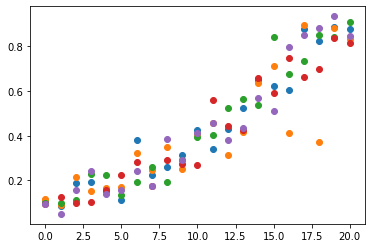

In [26]:
plt.plot(ctt.transpose(), 'o')

In [34]:
np.repeat

<function numpy.repeat(a, repeats, axis=None)>

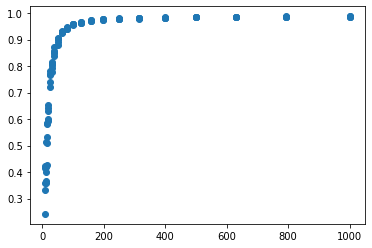

In [36]:
plt.scatter(np.repeat(n_ds,repeats=5,axis=0), itt.transpose())

In [41]:
dpi=100

Text(0.5, 1.0, 'MNIST')

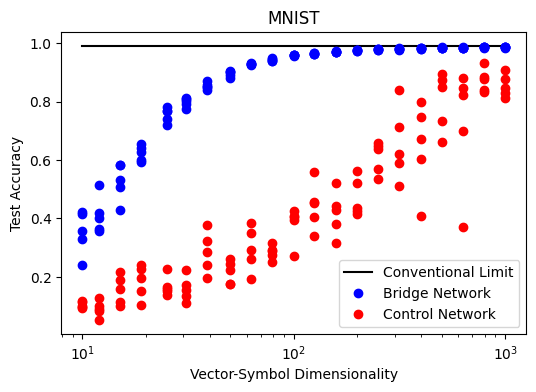

In [93]:
plt.figure(dpi=dpi)
plt.semilogx(n_ds, np.ones_like(n_ds)*upper_limit[1], color="black", label="Conventional Limit")
plt.semilogx(n_ds, itt.transpose()[:,0], 'o', color="blue", label="Bridge Network")
plt.semilogx(n_ds, ctt.transpose()[:,0], 'o', color="red", label="Control Network")
plt.semilogx(n_ds, itt.transpose()[:,1:], 'o', color="blue")
plt.semilogx(n_ds, ctt.transpose()[:,1:], 'o', color="red")
plt.xlabel("Vector-Symbol Dimensionality")
plt.ylabel("Test Accuracy")
plt.legend()
plt.title("MNIST")

In [94]:
np.savez_compressed("mnist_sweep.npz", iris=itt, control=ctt, upper=upper_limit[1])

In [90]:
np.mean(itt[:,-1])

0.98698

In [91]:
np.std(itt[:,-1])

0.0009744742172063618

In [92]:
upper_limit

[0.036331214010715485, 0.9915000200271606]